# Data Analysis

In [1]:
# Import dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np 

In [2]:
patients_df = pd.read_csv('analysis_data/patients.csv', dtype={'FIPS Code':str})
patients_df.iloc[-1,0] = 'NA'
patients_df.set_index('FIPS Code', drop=True, inplace=True)
patients_df = patients_df.drop('2021-04', axis = 1)
patients_df 

,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03
FIPS Code,,,,,,,,,,,,,,,
01001,0.0,0.0,14.0,38.0,148.0,326.0,485.0,386.0,331.0,391.0,733.0,1383.0,1536.0,578.0,210.0
01003,0.0,0.0,62.0,131.0,72.0,428.0,2073.0,1370.0,1340.0,937.0,2060.0,3994.0,4489.0,1516.0,417.0
01005,0.0,0.0,0.0,40.0,91.0,146.0,228.0,144.0,147.0,155.0,117.0,258.0,418.0,159.0,68.0
01007,0.0,0.0,0.0,35.0,29.0,97.0,190.0,173.0,114.0,203.0,340.0,563.0,473.0,123.0,53.0
01009,0.0,0.0,13.0,32.0,15.0,144.0,555.0,538.0,297.0,510.0,1083.0,1552.0,993.0,328.0,267.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
icu_df = pd.read_csv('analysis_data/icu.csv',dtype={'FIPS Code':str})
icu_df.iloc[-1,0] = 'NA'
icu_df.set_index('FIPS Code', drop=True, inplace=True)
icu_df  = icu_df.drop('2021-04', axis = 1)

In [4]:
census_data = pd.read_csv('analysis_data/census_2019.csv',dtype={'FIPS Code':str})
census_data.set_index('FIPS Code', drop=True, inplace=True)
census_data

,STNAME,CTYNAME,POPESTIMATE2019,TOT_MALE,TOT_FEMALE,0 - 17 years,18 - 49 years,50 - 64 years,65 + years,Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Percent non-Hispanic Other,Lat,Lng
FIPS Code,,,,,,,,,,,,,,,,,,
01001,Alabama,Autauga County,55869,27092,28777,14252,21652,11041,8924,0.0283,0.0025,0.0103,0.1900,0.0001,0.7460,0.6548,32.562500,-86.547800
01003,Alabama,Baldwin County,223234,108247,114987,52268,77402,46734,46830,0.0456,0.0065,0.0092,0.0917,0.0000,0.8307,0.6710,30.554945,-87.723960
01005,Alabama,Barbour County,24686,13064,11622,5595,9477,4753,4861,0.0436,0.0029,0.0048,0.4744,0.0000,0.4581,0.3463,31.787050,-85.429850
01007,Alabama,Bibb County,22394,11929,10465,4992,9233,4436,3733,0.0257,0.0013,0.0012,0.2214,0.0000,0.7453,0.6354,33.059925,-87.145725
01009,Alabama,Blount County,57826,28472,29354,14522,21002,11488,10814,0.0926,0.0007,0.0037,0.0153,0.0004,0.8689,0.7923,33.957085,-86.576808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,Wyoming,Sweetwater County,42343,21808,20535,12049,16959,7846,5489,0.1588,0.0102,0.0074,0.0112,0.0003,0.7956,0.5841,41.670024,-109.198271
56039,Wyoming,Teton County,23464,12142,11322,4586,10694,4467,3717,0.1503,0.0033,0.0125,0.0124,0.0012,0.8134,0.5153,43.515844,-110.815633
56041,Wyoming,Uinta County,20226,10224,10002,6215,7229,3757,3025,0.0913,0.0065,0.0016,0.0011,0.0000,0.8752,0.6935,41.293529,-110.539357


In [5]:
death_df = pd.read_csv('analysis_data/death.csv',dtype={'FIPS Code':str})
death_df.iloc[-1,0] = 'NA'
death_df.set_index('FIPS Code', drop=True, inplace=True)
death_df  = death_df.drop('2021-04', axis = 1)

In [6]:
total_abs = pd.read_csv('analysis_data/total_abs.csv',dtype={'FIPS Code':str})
total_abs.iloc[-1,0] = 'NA'
total_abs.set_index('FIPS Code', drop=True, inplace=True)
total_abs

,Patients,Hospitalized,ICU,Death
FIPS Code,,,,
01001,6622.0,148.0,0.0,0.0
01003,19052.0,280.0,0.0,119.0
01005,2001.0,62.0,0.0,0.0
01007,2408.0,62.0,0.0,0.0
01009,6376.0,87.0,0.0,11.0
...,...,...,...,...
56039,0.0,0.0,0.0,0.0
56041,0.0,0.0,0.0,0.0
56043,0.0,0.0,0.0,0.0


In [7]:
vaccination_df = pd.read_csv('analysis_data/vaccination_data.csv',dtype={'FIPS Code':str})
vaccination_df.set_index('FIPS Code', drop=True, inplace=True)
vaccination_df = vaccination_df[["Social Vulnerability Index (SVI)","SVI Category","Percent adults fully vaccinated against COVID-19"]]
vaccination_df

,Social Vulnerability Index (SVI),SVI Category,Percent adults fully vaccinated against COVID-19
FIPS Code,,,
1001,0.44,Moderate Concern,0.114
1003,0.22,Low Concern,0.176
1005,1.00,Very High Concern,0.128
1007,0.60,High Concern,0.115
1009,0.42,Moderate Concern,0.095
...,...,...,...
56037,0.37,Low Concern,0.228
56039,0.11,Very Low Concern,0.305
56041,0.45,Moderate Concern,0.206


In [8]:
tot_rel = pd.DataFrame((total_abs.iloc[0:-1,:]["Patients"]/census_data["POPESTIMATE2019"]), columns = ["Patients"])
tot_rel["Hospitalized"] = (total_abs.iloc[0:-1,:]["Hospitalized"]/census_data["POPESTIMATE2019"])
tot_rel["ICU"]= (total_abs.iloc[0:-1,:]["ICU"]/census_data["POPESTIMATE2019"])
tot_rel["Death"]= (total_abs.iloc[0:-1,:]["Death"]/census_data["POPESTIMATE2019"])
tot_rel

,Patients,Hospitalized,ICU,Death
FIPS Code,,,,
01001,0.118527,0.002649,0.0,0.000000
01003,0.085345,0.001254,0.0,0.000533
01005,0.081058,0.002512,0.0,0.000000
01007,0.107529,0.002769,0.0,0.000000
01009,0.110262,0.001505,0.0,0.000190
...,...,...,...,...
56037,0.000000,0.000000,0.0,0.000000
56039,0.000000,0.000000,0.0,0.000000
56041,0.000000,0.000000,0.0,0.000000


In [9]:
total_abs

,Patients,Hospitalized,ICU,Death
FIPS Code,,,,
01001,6622.0,148.0,0.0,0.0
01003,19052.0,280.0,0.0,119.0
01005,2001.0,62.0,0.0,0.0
01007,2408.0,62.0,0.0,0.0
01009,6376.0,87.0,0.0,11.0
...,...,...,...,...
56039,0.0,0.0,0.0,0.0
56041,0.0,0.0,0.0,0.0
56043,0.0,0.0,0.0,0.0


In [10]:
worst_fip_patient= tot_rel.sort_values(by="Patients", ascending=False)
worst_fip_patient

,Patients,Hospitalized,ICU,Death
FIPS Code,,,,
21003,0.185409,0.009102,0.000000,0.000000
27105,0.183735,0.009524,0.001526,0.000509
16065,0.176185,0.002080,0.000000,0.000000
20175,0.175005,0.017034,0.003640,0.000000
04027,0.172910,0.010590,0.000000,0.002273
...,...,...,...,...
28105,0.000000,0.000000,0.000000,0.000000
28103,0.000000,0.000000,0.000000,0.000000
28101,0.000000,0.000000,0.000000,0.000000


In [11]:
total_abs.loc["21003"]

Patients        3952.0
Hospitalized     194.0
ICU                0.0
Death              0.0
Name: 21003, dtype: float64

In [12]:
census_data.loc["21003"]

STNAME                                                       Kentucky
CTYNAME                                                  Allen County
POPESTIMATE2019                                                 21315
TOT_MALE                                                        10575
TOT_FEMALE                                                      10740
0 - 17 years                                                     5372
18 - 49 years                                                    7718
50 - 64 years                                                    4374
65 + years                                                       3851
Percent Hispanic                                               0.0216
Percent non-Hispanic American Indian/Alaska Native                0.0
Percent non-Hispanic Asian                                     0.0062
Percent non-Hispanic Black                                     0.0099
Percent non-Hispanic Native Hawaiian/Pacific Islander             0.0
Percent non-Hispanic

In [13]:
vaccination_df.loc["21003"]

Social Vulnerability Index (SVI)                            0.68
SVI Category                                        High Concern
Percent adults fully vaccinated against COVID-19           0.188
Name: 21003, dtype: object

In [14]:
vaccination_df.mean()

Social Vulnerability Index (SVI)                    0.500000
Percent adults fully vaccinated against COVID-19    0.188573
dtype: float64

In [15]:
#See most affected FIPS and less affected FIPS ( by patient number)
worst_fip_patient= total_abs.sort_values(by='Patients', ascending=False)
worst_fip_patient.head()

,Patients,Hospitalized,ICU,Death
FIPS Code,,,,
NA,1788654.0,59949.0,6205.0,19529.0
06037,1124813.0,81869.0,15949.0,21291.0
04013,531243.0,46700.0,1.0,8435.0
17031,530918.0,31810.0,5525.0,11573.0
12086,398878.0,9375.0,1.0,6136.0


In [16]:
worst_ten_pat = worst_fip_patient.iloc[1:11, :]
worst_ten_pat

,Patients,Hospitalized,ICU,Death
FIPS Code,,,,
06037,1124813.0,81869.0,15949.0,21291.0
04013,531243.0,46700.0,1.0,8435.0
17031,530918.0,31810.0,5525.0,11573.0
12086,398878.0,9375.0,1.0,6136.0
06071,289868.0,9806.0,1386.0,3724.0
06065,285987.0,7458.0,824.0,3483.0
06073,274033.0,15143.0,1657.0,2833.0
36047,268440.0,33398.0,2396.0,10704.0
36081,266518.0,33505.0,2539.0,9928.0


In [17]:
best_fip_patient= total_abs.sort_values(by='Patients', ascending=True)
best_fip_patient.head(1650)

,Patients,Hospitalized,ICU,Death
FIPS Code,,,,
29177,0.0,0.0,0.0,0.0
29143,0.0,0.0,0.0,0.0
29141,0.0,0.0,0.0,0.0
29139,0.0,0.0,0.0,0.0
29137,0.0,0.0,0.0,0.0
...,...,...,...,...
20071,0.0,0.0,0.0,0.0
20181,0.0,0.0,0.0,0.0
20193,0.0,0.0,0.0,0.0


In [18]:
#See most affected FIPS and less affected FIPS ( by death number)
worst_fip_death = total_abs.sort_values(by='Death', ascending=False)

In [19]:
worst_ten_death = worst_fip_death.iloc[0:11, :]
worst_ten_death

,Patients,Hospitalized,ICU,Death
FIPS Code,,,,
06037,1124813.0,81869.0,15949.0,21291.0
NA,1788654.0,59949.0,6205.0,19529.0
17031,530918.0,31810.0,5525.0,11573.0
36047,268440.0,33398.0,2396.0,10704.0
36081,266518.0,33505.0,2539.0,9928.0
04013,531243.0,46700.0,1.0,8435.0
36005,176885.0,24002.0,3006.0,6592.0
12086,398878.0,9375.0,1.0,6136.0
06059,251902.0,10366.0,1875.0,4121.0


## Vaccinated vs. Time 

## Time Line for worst FIPS 

## Sex, ethnic group and age of best against worst FIPS

## Scatter (patients and vaccinated) 

### CDC SVI

SVI values range from 0 (least vulnerable) to 1 (most vulnerable). The SVI can also be categorized as follows: Very Low (0.0-0.19), Low (0.20-0.39); Moderate (0.40-0.59); High (0.60-0.79); Very High (0.80-1.0). The ability to handle a COVID-19 outbreak was obtained from the Surgo Covid-19 Vaccine Coverage Index (CVAC).

In [136]:
import math

In [137]:
vaccination_df = pd.read_csv('analysis_data/vaccination_data.csv',dtype={'FIPS Code':str})

fips_census = []
for index, row in vaccination_df.iterrows():
        fips_census.append(f"{row['FIPS Code']:0>5}")

vaccination_df.drop('FIPS Code', axis=1, inplace=True)
vaccination_df['FIPS Code'] = fips_census
vaccination_df.set_index('FIPS Code', drop=True, inplace=True)

vaccination_df = vaccination_df[["Social Vulnerability Index (SVI)","SVI Category","Percent adults fully vaccinated against COVID-19"]]

In [138]:
pat = tot_rel['Patients']
vacc = vaccination_df['Percent adults fully vaccinated against COVID-19']
svi = vaccination_df['Social Vulnerability Index (SVI)']

scatter_df = pd.DataFrame(data={pat.name:pat, vacc.name:vacc.values, svi.name:svi})
scatter_df.dropna(inplace=True)

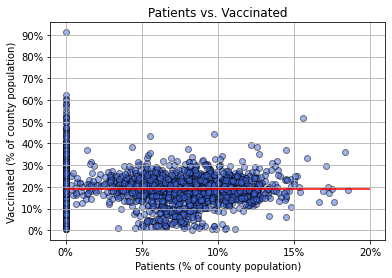

In [139]:
x_values = scatter_df['Patients']
y_values = scatter_df['Percent adults fully vaccinated against COVID-19']
c_values = scatter_df['Social Vulnerability Index (SVI)']

## SCATTER PLOT
## Set Scatter Plot parameters
plt.scatter(x_values, y_values, color='royalblue', alpha=0.5, edgecolors= "black")


# Set Title, X Label, and Y Label
plt.title(f"Patients vs. Vaccinated")
plt.xlabel("Patients (% of county population)")
plt.ylabel("Vaccinated (% of county population)")

x_lim = math.ceil(x_values.max()*100/5)*5
x_ticks = [i/100 for i in range(0, x_lim+1, 5)]
x_ticks_labels = [f'{i/100:.0%}' for i in range(0, x_lim+1, 5)]
plt.xticks(x_ticks, x_ticks_labels, rotation=0)

y_lim = math.ceil(y_values.max()*100/10)*10
y_ticks = [i/100 for i in range(0, y_lim+1, 10)]
y_ticks_labels = [f'{i/100:.0%}' for i in range(0, y_lim+1, 10)]
plt.yticks(y_ticks, y_ticks_labels, rotation=0)

plt.hlines(y_values.mean(), 0, x_lim/100, color='red')

## Show grid
plt.grid()

# Save plot
# plt.savefig(f"Figures/Scatter_01.png")

## Show plot
plt.show()

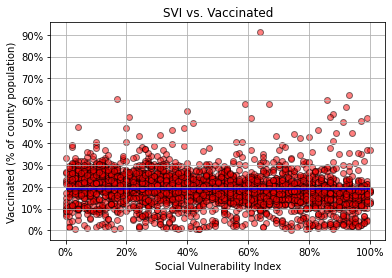

In [140]:
x_values = scatter_df['Social Vulnerability Index (SVI)']
y_values = scatter_df['Percent adults fully vaccinated against COVID-19']

## SCATTER PLOT
## Set Scatter Plot parameters
plt.scatter(x_values, y_values, color='red', alpha=0.5, edgecolors= 'black')
# plt.scatter(x_values, c_values, c=y_values, cmap='plasma', alpha=0.75, edgecolors= 'black')

# Set Title, X Label, and Y Label
plt.title(f"SVI vs. Vaccinated")
plt.xlabel("Social Vulnerability Index")
plt.ylabel("Vaccinated (% of county population)")

x_max = math.ceil(x_values.max()*100/20)*20
x_ticks = [i/100 for i in range(0, x_max+1, 20)]
x_ticks_labels = [f'{i/100:.0%}' for i in range(0, x_max+1, 20)]
plt.xticks(x_ticks, x_ticks_labels, rotation=0)

y_max = math.ceil(y_values.max()*100/10)*10
y_ticks = [i/100 for i in range(0, y_max+1, 10)]
y_ticks_labels = [f'{i/100:.0%}' for i in range(0, y_max+1, 10)]
plt.yticks(y_ticks, y_ticks_labels, rotation=0)

plt.hlines(y_values.mean(), 0, x_max/100, color='blue')

## Show grid
plt.grid()
# Save plot
# plt.savefig(f"Output/Scatter_01.png")

## Show plot
plt.show()

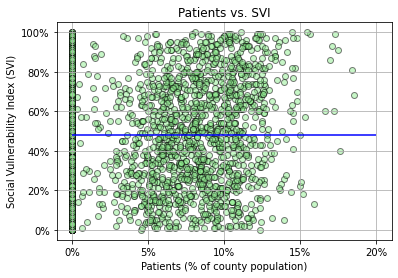

In [141]:
x_values = scatter_df['Patients']
y_values = scatter_df['Social Vulnerability Index (SVI)']
c_values = scatter_df['Percent adults fully vaccinated against COVID-19']

## SCATTER PLOT
## Set Scatter Plot parameters
plt.scatter(x_values, y_values, color='lightgreen', alpha=0.5, edgecolors= 'black')
# plt.scatter(x_values, y_values, c=c_values, cmap='plasma', alpha=0.75, edgecolors= 'black')

# Set Title, X Label, and Y Label
plt.title(f"Patients vs. SVI")
plt.xlabel("Patients (% of county population)")
plt.ylabel("Social Vulnerability Index (SVI)")

x_max = math.ceil(x_values.max()*100/5)*5
x_ticks = [i/100 for i in range(0, x_max+1, 5)]
x_ticks_labels = [f'{i/100:.0%}' for i in range(0, x_max+1, 5)]
plt.xticks(x_ticks, x_ticks_labels, rotation=0)

y_max = math.ceil(y_values.max()*100/20)*20
y_ticks = [i/100 for i in range(0, y_max+1, 20)]
y_ticks_labels = [f'{i/100:.0%}' for i in range(0, y_max+1, 20)]
plt.yticks(y_ticks, y_ticks_labels, rotation=0)

plt.hlines(y_values.mean(), 0, x_max/100, color='blue')

## Show grid
plt.grid()
# Save plot
# plt.savefig(f"Output/Scatter_01.png")

## Show plot
plt.show()

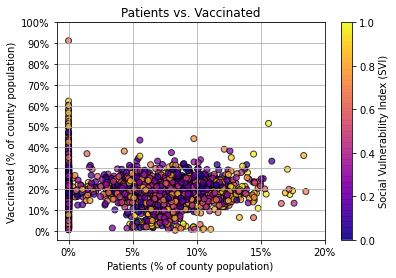

In [133]:


x_values = scatter_df['Patients']
y_values = scatter_df['Percent adults fully vaccinated against COVID-19']
c_values = scatter_df['Social Vulnerability Index (SVI)']

## SCATTER PLOT
## Set Scatter Plot parameters
contour = plt.scatter(x_values, y_values, c=c_values, cmap='plasma', alpha=0.75, edgecolors= "black")

# Set Title, X Label, and Y Label
plt.title(f"Patients vs. Vaccinated")
plt.xlabel("Patients (% of county population)")
plt.ylabel("Vaccinated (% of county population)")

x_lim = math.ceil(x_values.max()*100/5)*5
x_ticks = [i/100 for i in range(0, x_lim+1, 5)]
x_ticks_labels = [f'{i/100:.0%}' for i in range(0, x_lim+1, 5)]
plt.xticks(x_ticks, x_ticks_labels, rotation=0)

y_lim = math.ceil(y_values.max()*100/10)*10
y_ticks = [i/100 for i in range(0, y_lim+1, 10)]
y_ticks_labels = [f'{i/100:.0%}' for i in range(0, y_lim+1, 10)]
plt.yticks(y_ticks, y_ticks_labels, rotation=0)

# plt.hlines(y_values.mean(), 0, x_lim/100, color='red')

## Show grid
plt.grid()

cbar = plt.colorbar(contour)
cbar.set_label('Social Vulnerability Index (SVI)')

# Save plot
# plt.savefig(f"Output/Scatter_01.png")

## Show plot
plt.show()

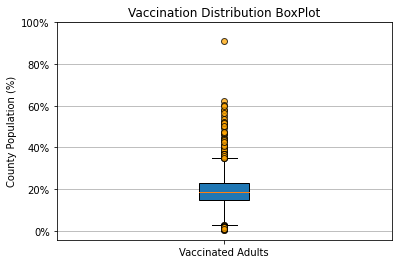

In [132]:
x_values = scatter_df['Patients']
y_values = scatter_df['Percent adults fully vaccinated against COVID-19']

## BOX PLOT
## Set Box Plot parameters
outlier_style = dict(markerfacecolor='orange', marker='o', alpha=0.75)
plt.boxplot(y_values, patch_artist=True, flierprops=outlier_style)

# Give the chart a title and y label
plt.title("Vaccination Distribution BoxPlot")
plt.ylabel("County Population (%)")
# Set x_axis properties
plt.xticks([1],["Vaccinated Adults"])
# Set y_axis properties
y_ticks = [i/100 for i in range(0, 100+1, 20)]
y_ticks_labels = [f'{i/100:.0%}' for i in range(0, 100+1, 20)]
plt.yticks(y_ticks, y_ticks_labels, rotation=0)

## Show grid
plt.grid(axis='y')
## Save plot
plt.savefig("figures/vaccination_boxplot.png")
## Show plot
plt.show()

In [32]:
st.pearsonr(x_values.values, y_values.values)


ValueError: array must not contain infs or NaNs

In [ ]:
st.pearsonr(x_values, y_values)

In [ ]:
y_values

## Bars for ethnic groups 

## Heatmap 

## Regressions for sex, age and ethnic group 